# Decision Trees

Decision Trees are capable of drawing multiple decision boundaries, in essence create a tree structure leading to desired outcomes.

![DT](images/ml22.png)

More complex example

![DT](images/ml23.png)

Trying to train the Acceleration Module of Car to decide acceleration based in bumpiness and slope of the terrian.

1. We will generate data
2. Classify using Gaussian Naive Bayes
3. Predict
4. Plot

#### Terrain Data Preparation 

In [1]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

#### Visualization Library

In [2]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print (image_start+json.dumps(data)+image_end)

#### Classifier

In [4]:
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    from sklearn import tree
    clf = tree.DecisionTreeClassifier()
    return clf.fit(features_train,labels_train)

#### Main

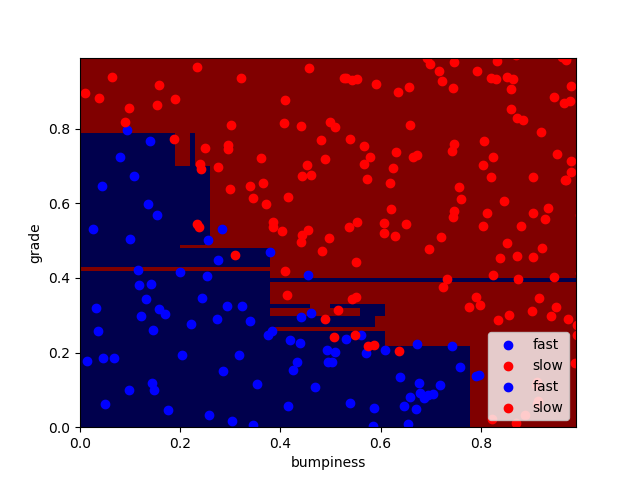

In [5]:
#!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
#from class_vis import prettyPicture, output_image
#from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
#from classifyDT import classify
from IPython.display import Image

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)


#### grader code, do not modify below this line

prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())
Image("test.png")

#### Let's run some prediction on test data

In [6]:
pred = clf.predict(features_test)

#### Let's evaluate / do accuracy test of our classifier

In [7]:
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score

accuracy_score(pred, labels_test)

0.91200000000000003

## How to optimize for better performance

There are many hyper-parameters to tune as we have seen earlier, below link has details on these. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

However, specifically we will make use of min_samples_split parameter. This basically states minimum number of samples required to split an internal node.

![DT](images/ml24.png)

So let's see how does this impact our use case  .. 

Lesser Value means it will keep splitting until minimum reaches the defined thereshold. As on earlier run or left side image, we used split value of 2, and if you we see more closely, there is horizintal blue bar, ie system tried fitting very closely to training data. This may result into over-fitting situation. We can resolve this by increasing value of min split ..

![DT](images/ml25.png)

### It does impact accuracy as well, ideally it should help boost accuracy ..

Accuracy: 0.912


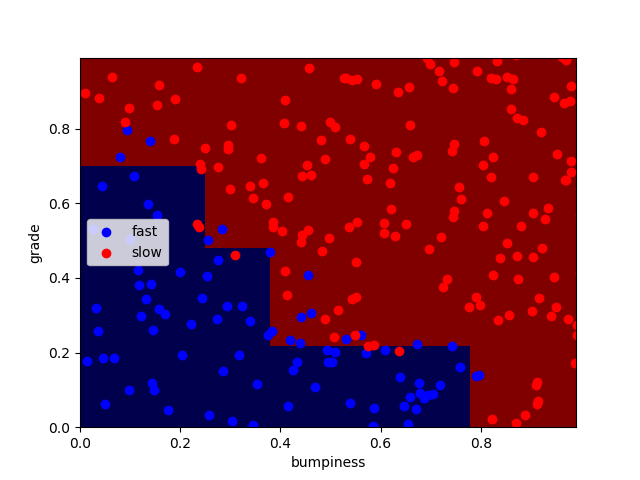

In [3]:
## Let's see it in code ..simply re-writing above function with new attributes

def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    from sklearn import tree
    clf = tree.DecisionTreeClassifier(min_samples_split=50)
    return clf.fit(features_train,labels_train)

 #!/usr/bin/python

""" lecture and example code for decision tree unit """

import sys
#from class_vis import prettyPicture, output_image
#from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
#from classifyDT import classify
from IPython.display import Image

features_train, labels_train, features_test, labels_test = makeTerrainData()



### the classify() function in classifyDT is where the magic
### happens--fill in this function in the file 'classifyDT.py'!
clf = classify(features_train, labels_train)


#### grader code, do not modify below this line

pred = clf.predict(features_test)

# sklearn accuracy_score function
from sklearn.metrics import accuracy_score

print "Accuracy:", accuracy_score(pred, labels_test)

prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())
Image("test.png")

## Entropy 

![DT](images/ml26.png)

![DT](images/ml27.png)
<br>
![DT](images/ml28.png)

In below example:

P${_i}$ for Slow Speed is 0.5 ( It is number of slow examples divide by total examples) and it happens to be same for Fast Speed Examples ..

hence, Entropy is 1 which is nothing but <br>
Entropy = Entropy Slow + Entropy Fast <br>
Entropy = (P${_i}$ * log${_2}$P${_i}$) + (P${_i}$ * log${_2}$P${_i}$)

![DT](images/ml29.png)

** Entropy of 1 means the classes are fairly coarse and can easily be separated with clear decision boundary**

** So how do we apply these back to Decision Trees, for this we must know a new term called Information Gain, in essence DT tries to maximize the Information Gain ** 

### Information Gain
![DT](images/ml30.png)

So information gain can help with decision in which vaiable to use for spilitting (more so we are featre engineering)

So let's take our old example and start over again on identifying Information Gain for various variables in play ..

So we know the parent being Speed Node has Entropy of 1, which is max Entropy, let's start here and compute Entropy, Information Gain

![DT](images/ml31.png)

![DT](images/ml32.png)

So if we split based on the Grade, we get Information Gain as ..
![DT](images/ml33.png)

So now, let's do the same for Bumpiness ..

![DT](images/ml34.png)

So Information Gain on Bumpiness is ZERO - which means we will not learn anything if we split on this feature hence we do not want to start splitting here ..

![DT](images/ml35.png)

So let's see what is the Information Gain on Speed Limit .. 

As it turns out, information gain is 1, which is the maximum, hence this is definitely the feature we would want to start with when we split ..

![DT](images/ml36.png)


** So this is how the decision tree looks like at the first split post parent, what we have done until yet is see how DT is figuiring out based on the Information Gain on where to split and how **

![DT](images/ml37.png)


** Interesting Call Out **

By default, DecisionTree use something called as **Gini Index**, which is nothing but another measure similar to **Entropy** for measure of Impurity. And we can choose between these when we define our classifier..
<br>[ Watch Youtube Video on how Gini Index calculate the splits, it has different formula and approach. In summary, lower Gini Index Value for columns and further various subsets (categories underneath) is used system to decide on where to start the split ]  

![DT](images/ml38.png)

# Bias & Variance

**Bias** - High Bias ML Algorithm is one that practcially ignores the data. So it almost has no capacity to learn anything.

**Variance** - Another extreme is where ML Algorithm is extremely perceptive to data, only replicates stuff it has seen before, this situation we would define as High Variance. This also means that out Algorithm will perform poorly with data it has not seen before and not able to generalize to the new stuff.

So ideally, what we want is good balance between Bias & Variance, there are always fine controls to tweak algorithms achieve this balance, and this is the art in ML to learn n master ..

# DT Strength & Weaknesses

**Strengths**
1. Easy to use
2. Has Graphical Sense to build better intuition and understand
3. We can build bigger classifier out of DT and it's called **Ensemble Methods** (We will see examples of building classifiers out of classifiers ie. Ensemble Method in Mini Project)

**Weaknesses**
1. Prone to overfitting (specifically if feature size is huge) 

# Mini Project

https://github.com/anshoomehra/ud120-projects/tree/master/decision_tree